In [1]:
### Q1 : predict delivary time using sorting time 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats 
import numpy as np

In [3]:
df = df = pd.read_csv("C:/Users/Tejal/Desktop/AS4 SLR/delivery_time (1).csv")

In [4]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
#### eda and data visualization 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df.shape

(21, 2)

In [9]:
df.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
df.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x25c40b318a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25c40b31de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c40b31600>],
 'medians': [<matplotlib.lines.Line2D at 0x25c40b32320>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c40b325c0>],
 'means': []}

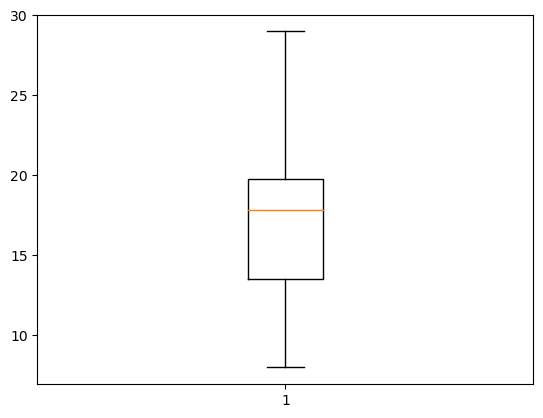

In [12]:
plt.boxplot(df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25c40c640a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25c40c645e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c40c23dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x25c40c64b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c40c64dc0>],
 'means': []}

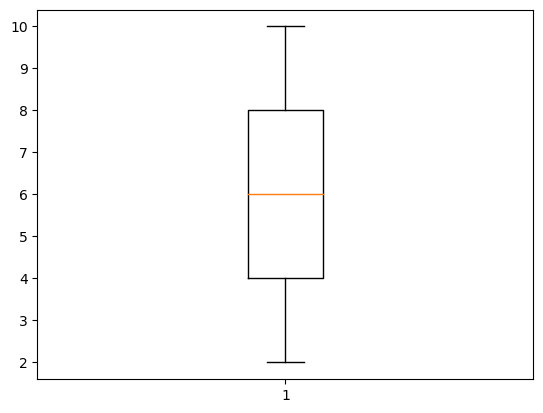

In [13]:
plt.boxplot(df['Sorting Time'])

C:\Users\Tejal\AppData\Local\Temp\ipykernel_17972\3643887613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

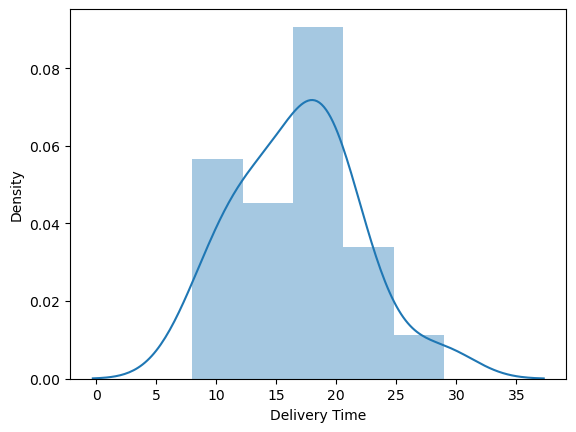

In [14]:
sns.distplot(df['Delivery Time'])

C:\Users\Tejal\AppData\Local\Temp\ipykernel_17972\2481827356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

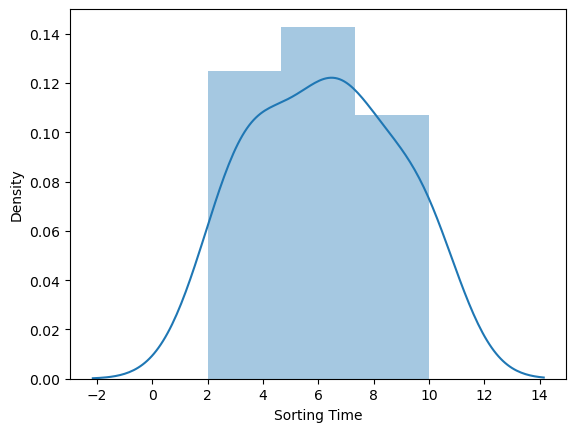

In [15]:
sns.distplot(df['Sorting Time'])

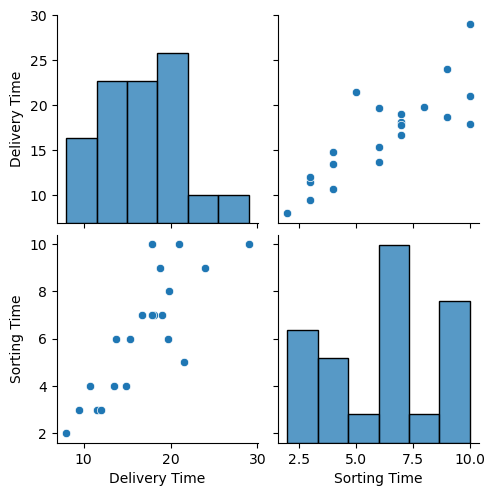

In [16]:
sns.pairplot(df)

In [17]:
df.corr()  #### co - relation analysis

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

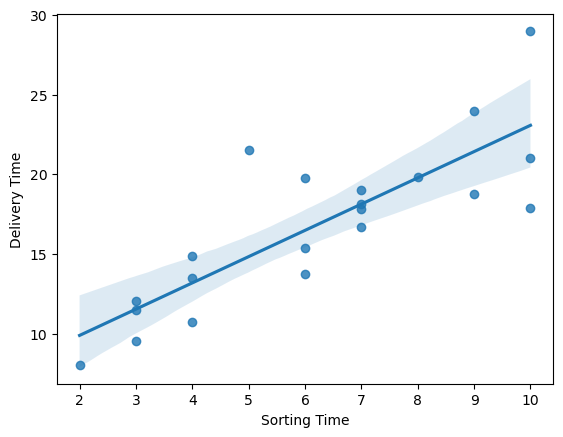

In [18]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])


In [24]:
data=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [26]:
import statsmodels.formula.api as smf
model1 = smf.ols("delivery_time~sorting_time",data = data).fit()


In [27]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)    


Intercept       6.582734
sorting_time    1.649020
dtype: float64 

 Intercept       3.823349
sorting_time    6.387447
dtype: float64 

 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [28]:
#R quared values
(model1.rsquared,model1.rsquared_adj)


(0.6822714748417231, 0.6655489208860244)

In [29]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        01:04:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data = data).fit()  #using log


In [31]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)    


Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64 

 Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64 

 Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [32]:
#R squard values
(model2.rsquared,model2.rsquared_adj)


(0.77216134926874, 0.7601698413355158)

In [33]:
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 17 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                           01:05:47   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3 = smf.ols("delivery_time~np.square(sorting_time)",data = data).fit()    #using square


In [35]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)    


Intercept                  11.237205
np.square(sorting_time)     0.124870
dtype: float64 

 Intercept                  9.398601
np.square(sorting_time)    5.691330
dtype: float64 

 Intercept                  1.415704e-08
np.square(sorting_time)    1.739194e-05
dtype: float64


In [36]:
#R squared values
(model3.rsquared,model3.rsquared_adj)


(0.6302871815826637, 0.6108286121922777)

In [37]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.74e-05
Time:                        01:06:55   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model4 = smf.ols("delivery_time~np.sqrt(sorting_time)",data = data).fit()  #using square root


In [40]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)    


Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64 

 Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64 

 Intercept                0.410857
np.sqrt(sorting_time)    0.000003
dtype: float64


In [41]:
#R squared values
(model4.rsquared,model4.rsquared_adj)


(0.6958062276308671, 0.6797960290851233)

In [42]:
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.61e-06
Time:                        01:09:00   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""